## Here I am going to build a logistic regression model from scratch and test in on breat cancer data

In [72]:
from numpy import log, dot, e
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import rand
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [73]:
df = pd.read_csv('data/breast_cancer_data.csv')

In [74]:
df.shape

(569, 33)

In [75]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [76]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [77]:
df.isna().sum() # so there is no nan except for unnamed

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [78]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [79]:
corr = df.corr()

<AxesSubplot:>

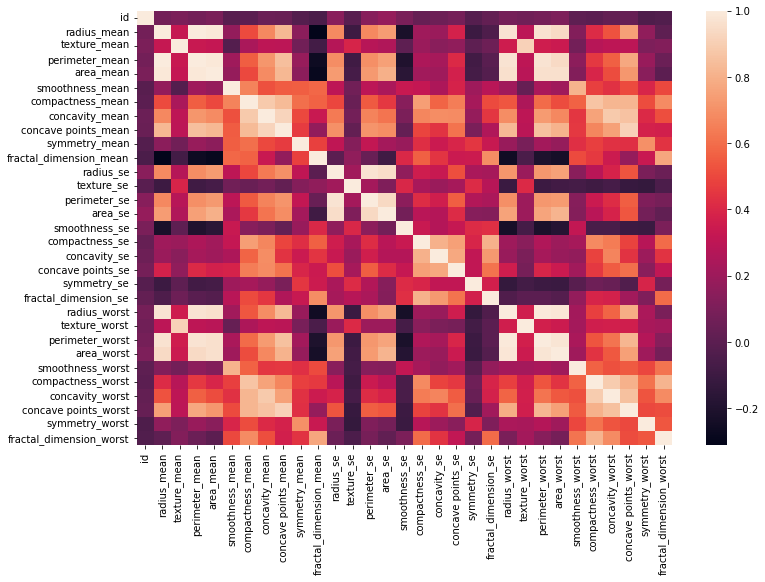

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(corr, ax = ax)

In [81]:
df['diagnosis'].replace({'B':0, 'M':1}, inplace=True)

<AxesSubplot:>

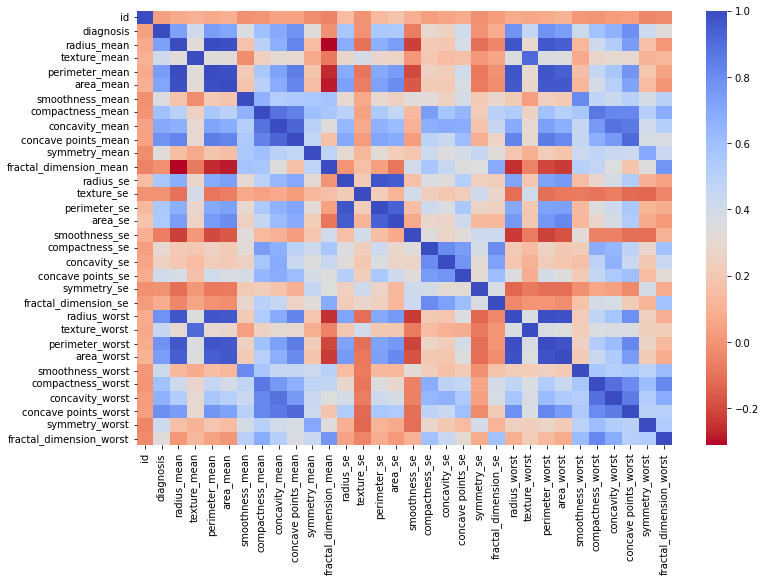

In [82]:
corr = df.corr()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm_r', ax=ax)

# It can be seen that the diagnosis has a higher corrolation with features like 'perimeter_worst', 'area_worst' than that with 'fractal_dimension_se' and 'smoothness_mean'

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

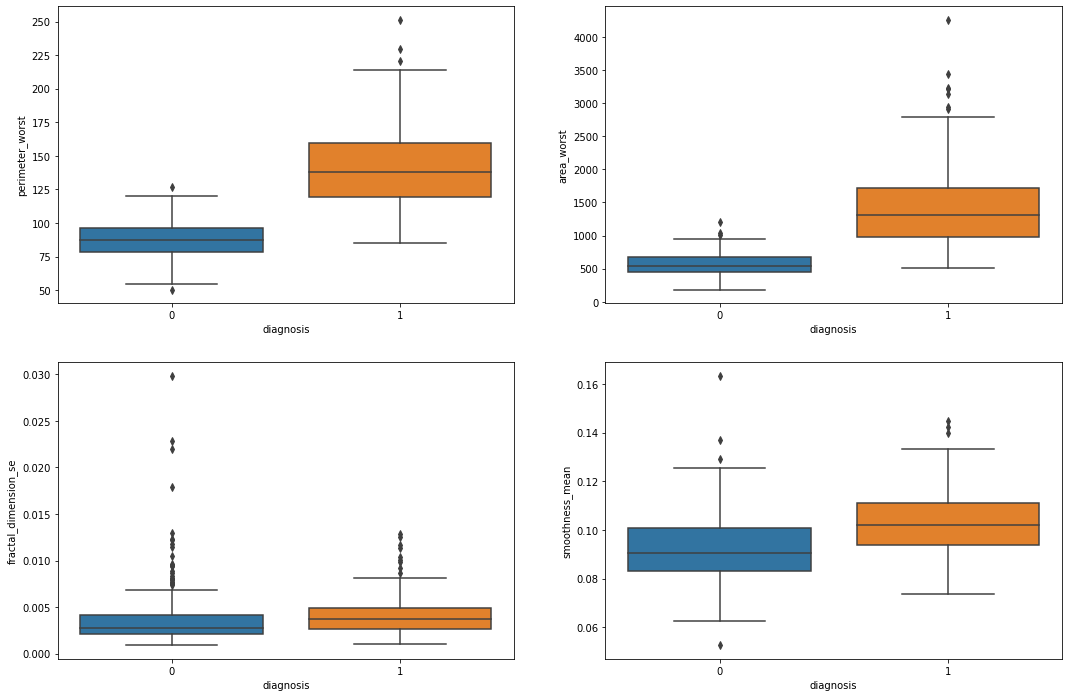

In [83]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

sns.boxplot(x=df['diagnosis'], y='perimeter_worst', data=df, ax=ax1)
sns.boxplot(x=df['diagnosis'], y='area_worst', data=df, ax=ax2)

sns.boxplot(x=df['diagnosis'], y='fractal_dimension_se', data=df, ax=ax3)
sns.boxplot(x=df['diagnosis'], y='smoothness_mean', data=df, ax=ax4)

In [84]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [85]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

In [86]:
X_scaled

array([[-0.99817048,  0.04207487, -0.9546838 , ...,  0.82405498,
         0.1969249 , -0.16227207],
       [-0.99817001,  0.28628899, -0.45485289, ...,  0.27835052,
        -0.53282082, -0.55424374],
       [-0.81500902,  0.20299115, -0.2194792 , ...,  0.67010309,
        -0.19258821, -0.57313394],
       ...,
       [-0.9979847 , -0.08949785,  0.24247548, ..., -0.02542955,
        -0.74255864, -0.69618261],
       [-0.99798407,  0.28912869,  0.32702063, ...,  0.82130584,
        -0.00571654, -0.09536928],
       [-0.99981547, -0.92626248,  0.00304363, ..., -1.        ,
        -0.48511729, -0.79863571]])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Logestic Regression

## for lofistic regression there are a few components that we should care for
- the sigmoid function: this is like an activation function on top of the predicted value for the response value of an obserevd input. The prediction itself is calculated based on a linear function between the predictores (independent variables)
\begin{align*}
z_{i} & = w_{1}x_{1} + w_{2}x_{2} + .. + w_{n}x_{n} \\
\hat{y} & = \frac{1}{1+ e^{-z}}
\end{align*}
- the loss function
\begin{align*}
L = -\frac{1}{m}\sum_{i = 1}^{m}[y*ln(\hat{y}) + (1-y)*ln(1- \hat{y})]
\end{align*}
- then we need the gradiant of this loss function with respect to our parameters to update the weights
-  The gradiant is calculated by getting the drivitive of L which is:
\begin{align*}
L' = x_{i}*(\hat{y}-y)
\end{align*}

In [99]:
class LogisticRegression:
    def sigmoid(self, z):
        return 1 / (1 + e ** (-z))
    
    def loss_function(self,X, weight, y):
        z = dot(X, weight)
        y_hat = self.sigmoid(z)
        p1 = y * log(y_hat) # prediction for the possitive class
        p0 = (1 - y) * log(1 - y_hat)
        l = -sum(p1 + p0)/len(X)
        return l
    
    def gradiant(self, X, y, y_hat):
        return dot(X.T , y_hat - y)
    
    def fit(self, X, y, epochs=50, lr=0.01):
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
        for _ in range(epochs):
            z = dot(X, weights)
            y_hat = self.sigmoid(z)
            l = self.loss_function(X, weights, y)
            grad = self.gradiant(X, y, y_hat)
            weights -= lr * grad / N
            loss.append(l)
        self.weights = weights
        self.loss = loss
        
        
    def predict(self, X):
        z = dot(X, self.weights)
        return [1 if p > 0.5 else 0 for p in self.sigmoid(z)]
        
        

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       121
           1       0.97      0.94      0.95        67

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188

-------------------------------------------------------
Confusion Matrix

[[119   2]
 [  4  63]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


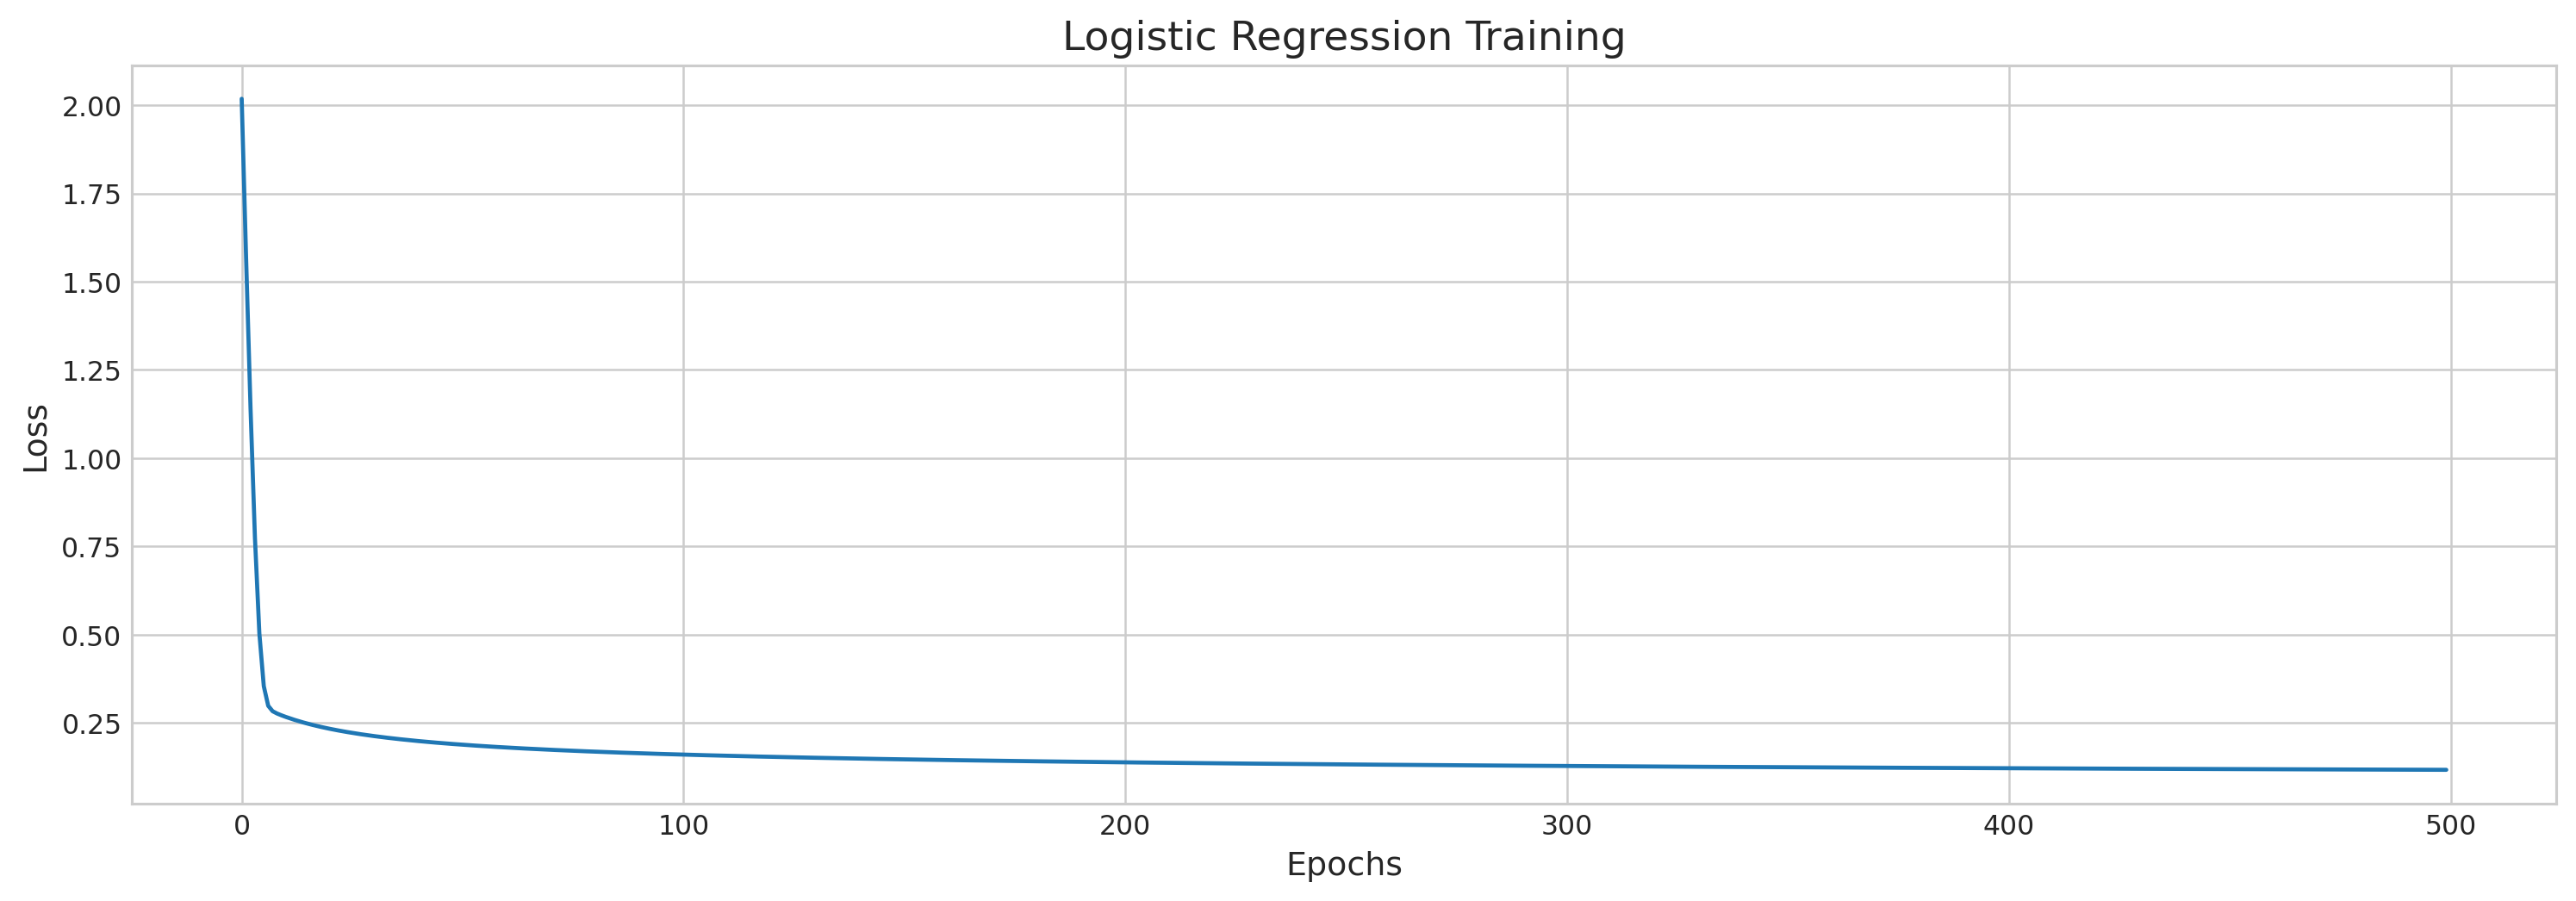

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=500, lr=0.5)
y_pred = logreg.predict(X_test)

## evaluation
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))


## plotting the loss
plt.plot(logreg.loss)
plt.title('Logistic Regression Training', fontSize=15)
plt.xlabel('Epochs', fontSize=12)
plt.ylabel('Loss', fontSize=12)
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       121
           1       0.94      0.99      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188

-------------------------------------------------------
Confusion Matrix

[[117   4]
 [  1  66]]
